<a href="https://colab.research.google.com/github/kimbaorrr/colab_exercises/blob/main/NDDT/NDDT_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

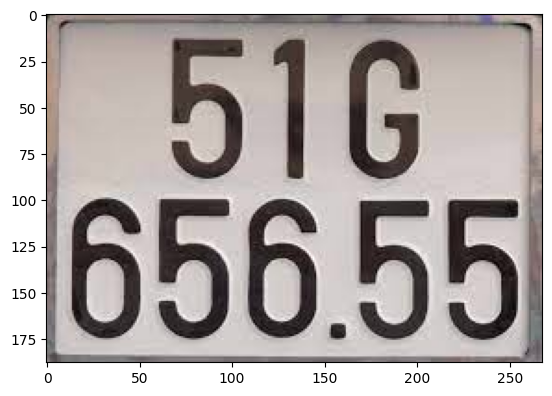

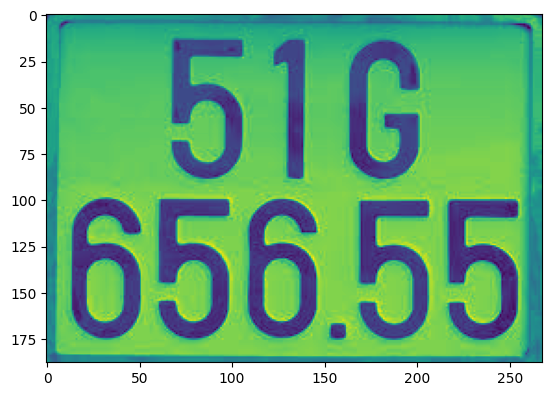

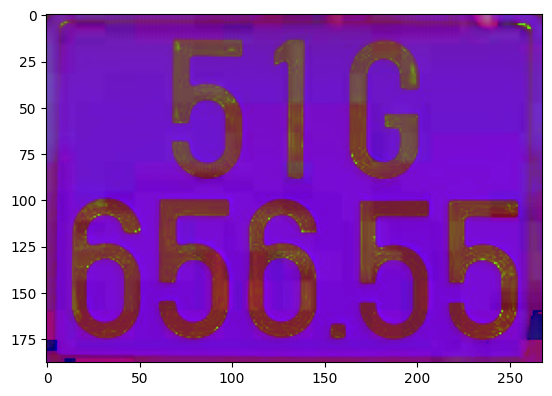

In [ ]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Đọc và hiển thị ảnh
image = cv2.imread('example.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
for i in [image, gray, hsv]:
  plt.imshow(i)
  plt.show()

In [ ]:
blurImg = cv2.GaussianBlur(gray, (7, 7), cv2.BORDER_DEFAULT)


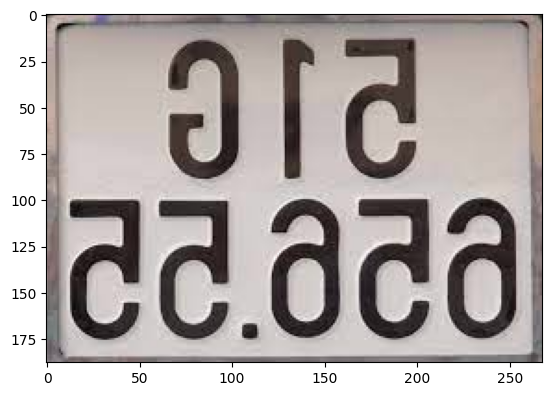

In [ ]:
# Xoay ảnh theo chiều dọc
rot = image[:, ::-1]
plt.imshow(rot, cmap='gray')
plt.show()


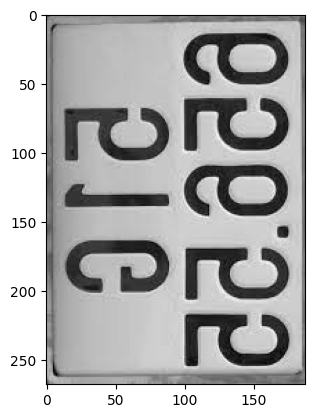

In [ ]:
# Xoay ảnh theo đường chéo chính
result = gray.transpose()
plt.imshow(result,cmap='gray')
plt.show()


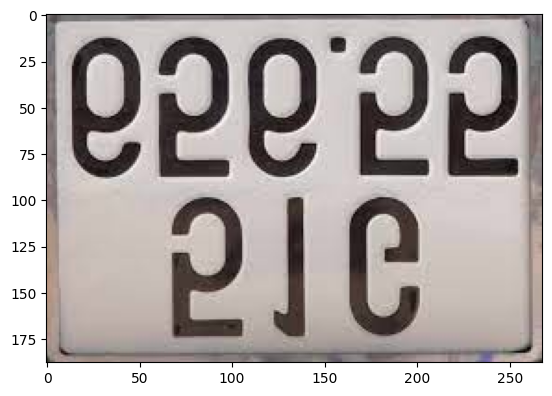

In [ ]:
# Xoay ảnh theo chiều ngang
result = image[::-1, :]
plt.imshow(result,cmap='gray')
plt.show()


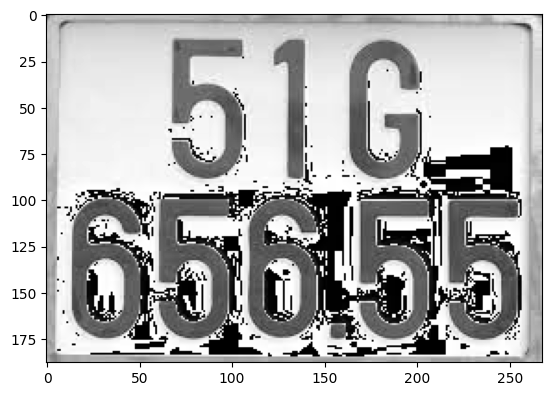

In [ ]:
# Điều chỉnh độ sáng tối của ảnh
result = gray.copy()
result = result + 50
plt.imshow(result, cmap='gray')
plt.show()

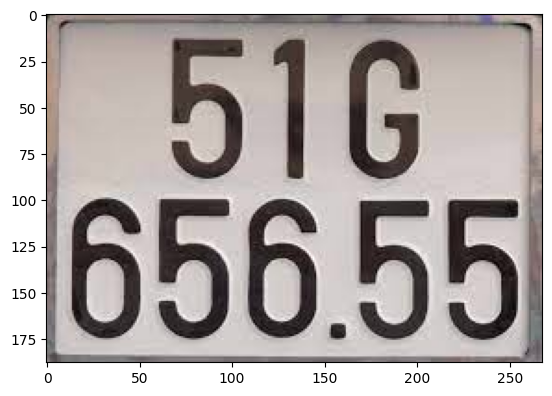

In [ ]:
# Đổi màu một vùng ảnh
result = image.copy()
result[100:250, 300:450] = 255
plt.imshow(result)
plt.show()

True

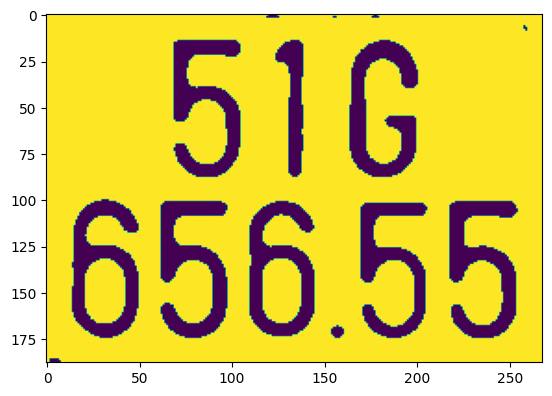

In [ ]:
# Phân ngưỡng ảnh GRAY theo ngưỡng từ 100 đến 255 với loại phân ngưỡng là THRESH_BINARY
ret, binImg = cv2.threshold(blurImg, 100, 255, cv2.THRESH_BINARY)
plt.imshow(binImg)
cv2.imwrite('binImg.jpg', binImg)

-1

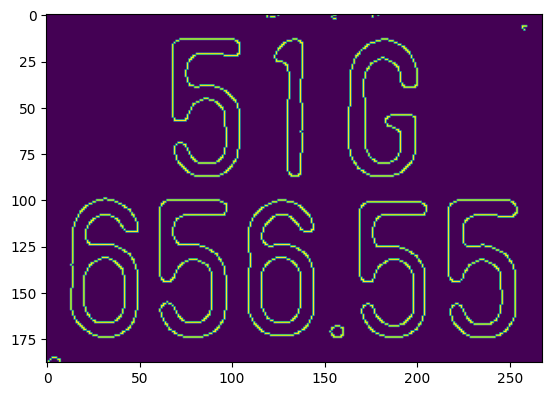

In [ ]:
# Find Canny edges
edged = cv2.Canny(binImg, 100, 200)
plt.imshow(edged)
cv2.waitKey(0)

In [ ]:
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.waitKey(0)

-1

Number of Contours found = 17


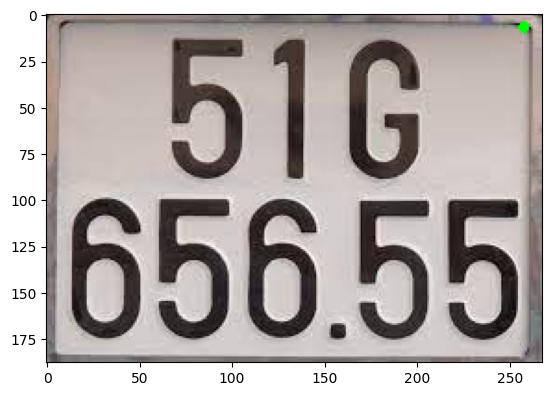

In [ ]:
print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(image, contours, 10, (0, 255, 0), 3)

plt.imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
rect = []
for i in range(len(contours)):
  x,y,w,h = cv2.boundingRect(contours[i])
  print(x, y, w, h)
  if 16 <= w <= 38:
    rect.append([x, y, w, h])
rect = rect[::-1]

1 185 7 3
153 168 8 7
169 101 37 74
217 100 38 75
109 100 36 74
61 100 37 75
13 99 37 76
163 13 38 75
123 13 16 75
68 13 37 75
257 6 3 3
121 1 3 1
179 0 1 1
176 0 1 2
154 0 3 3
125 0 1 1
119 0 1 2


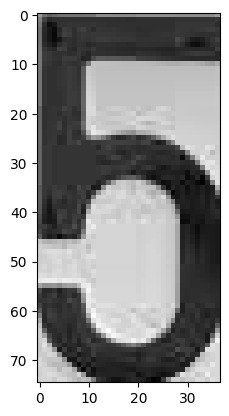

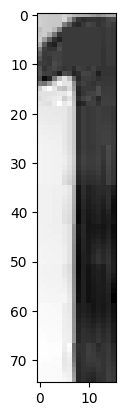

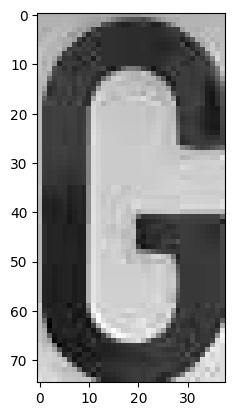

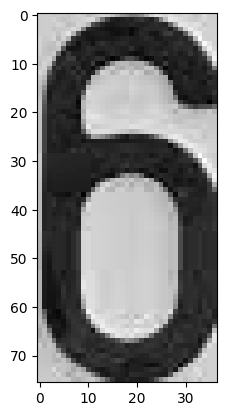

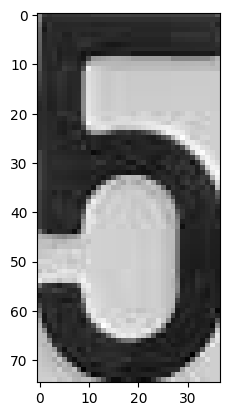

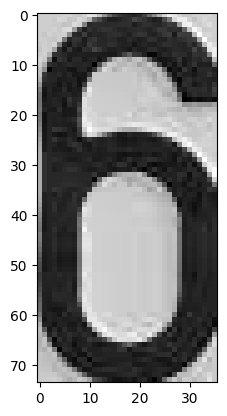

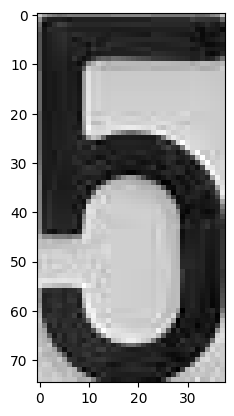

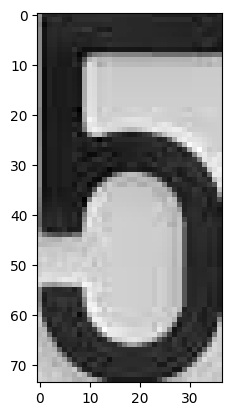

In [ ]:
for i in range(len(rect)):
  x, y, w, h = rect[i]
  im = gray[y: y + h, x: x + w]
  plt.imshow(im, cmap='gray')
  plt.show()

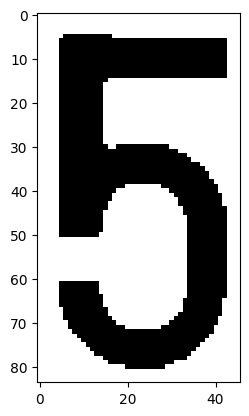

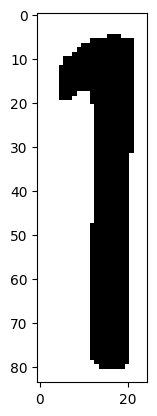

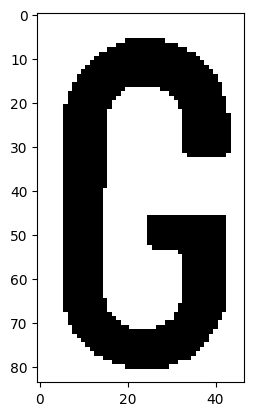

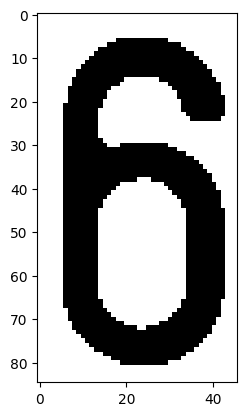

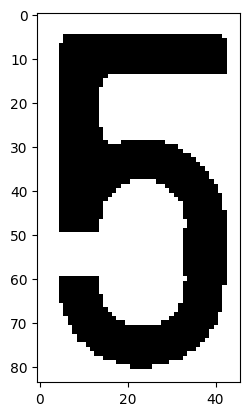

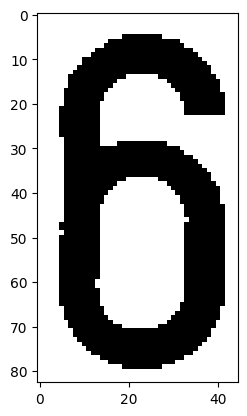

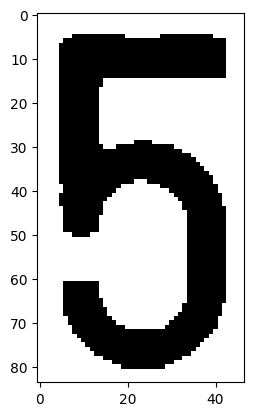

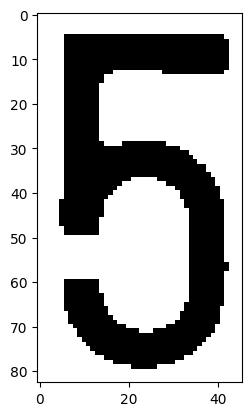

In [ ]:

for i in range(len(rect)):
  x, y, w, h = rect[i]
  x = x - 5
  y = y - 5
  im = gray[y: y + h + 9, x: x + w + 9]
  ret, th1 = cv2.threshold(im,127,255,cv2.THRESH_BINARY)
  plt.imshow(th1, cmap='gray')
  plt.show()
